In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

# READING AND UNDERSTANDING THE DATA

In [76]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [77]:
df.shape

(205, 26)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [79]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [80]:
df.dtypes.value_counts()

object     10
int64       8
float64     8
Name: count, dtype: int64

#  DATA CLEANING AND EXPLORATORY DATA ANALYSIS

In [81]:
df['CarName']=df['CarName'].apply(lambda x:x.split(' ', 1)[0])
df.rename(columns = {'CarName':'companyname'}, inplace = True)
df.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [82]:
df.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [83]:
#fixing values in company name
df.companyname =df.companyname.str.lower()

def replace_name(a,b):
    df.companyname.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [84]:
df.companyname.nunique()

22

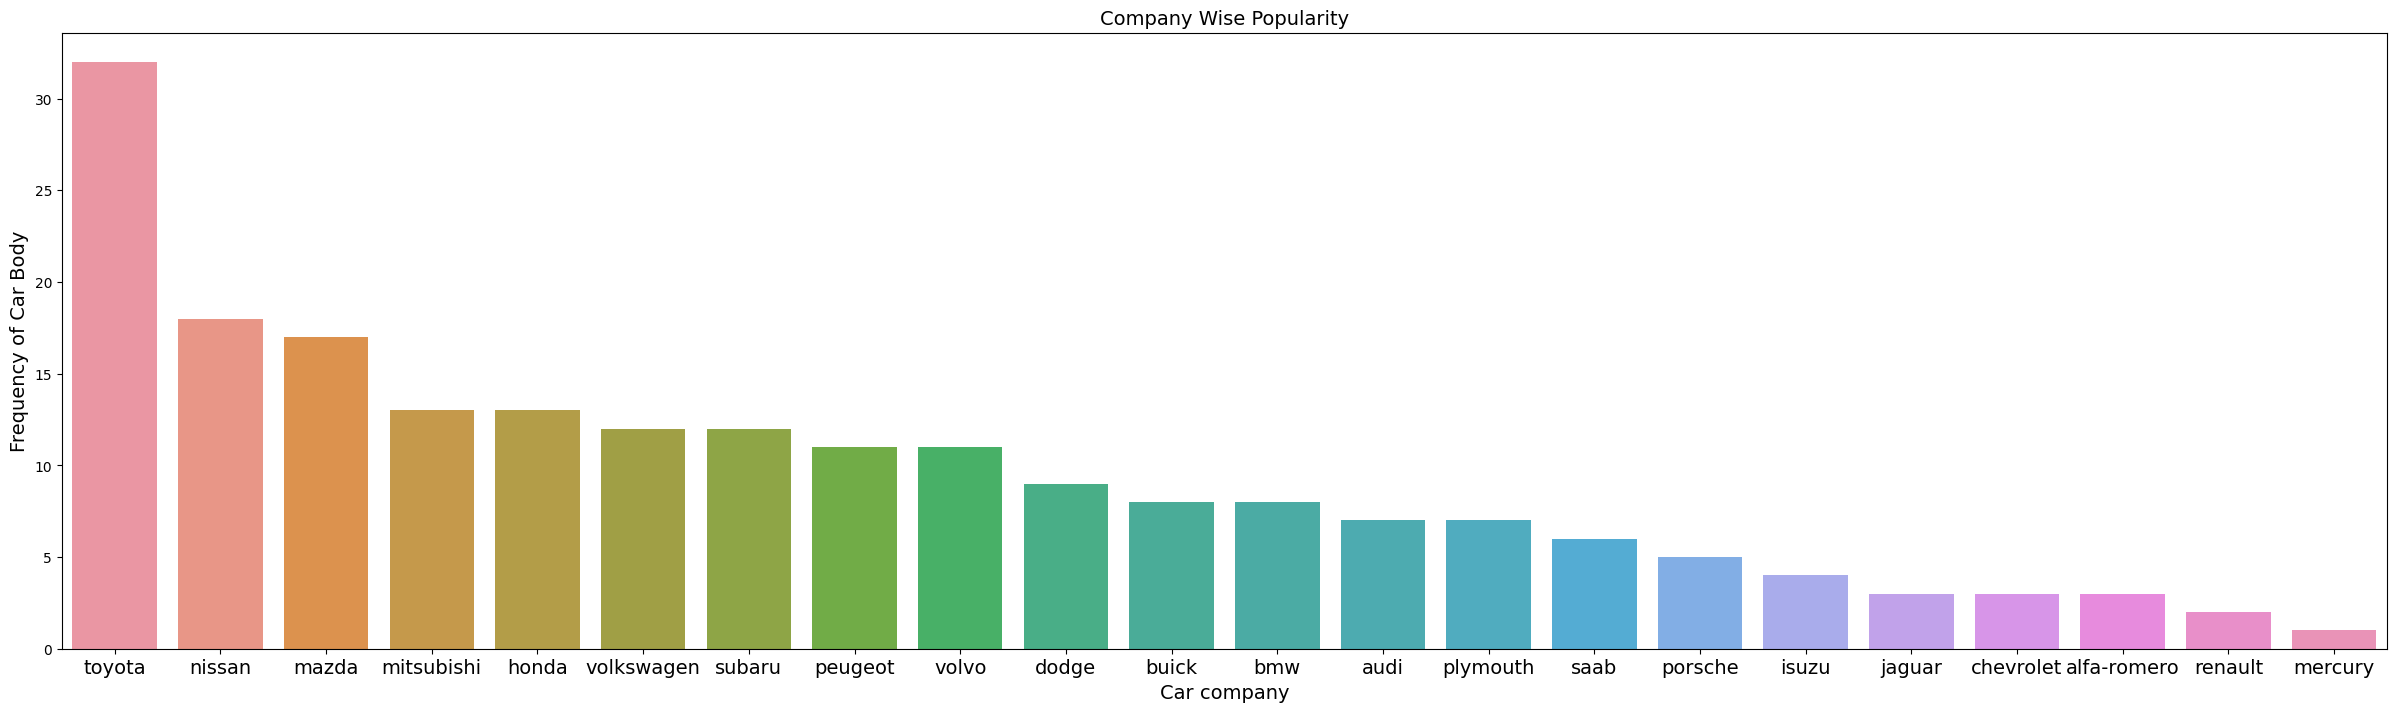

In [85]:
#plotting count of company names

plt.figure(figsize=(30, 8))
plt1=sns.countplot(x=df.companyname, data=df, order= df.companyname.value_counts().index)
plt.title('Company Wise Popularity', size=14)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Frequency of Car Body', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()

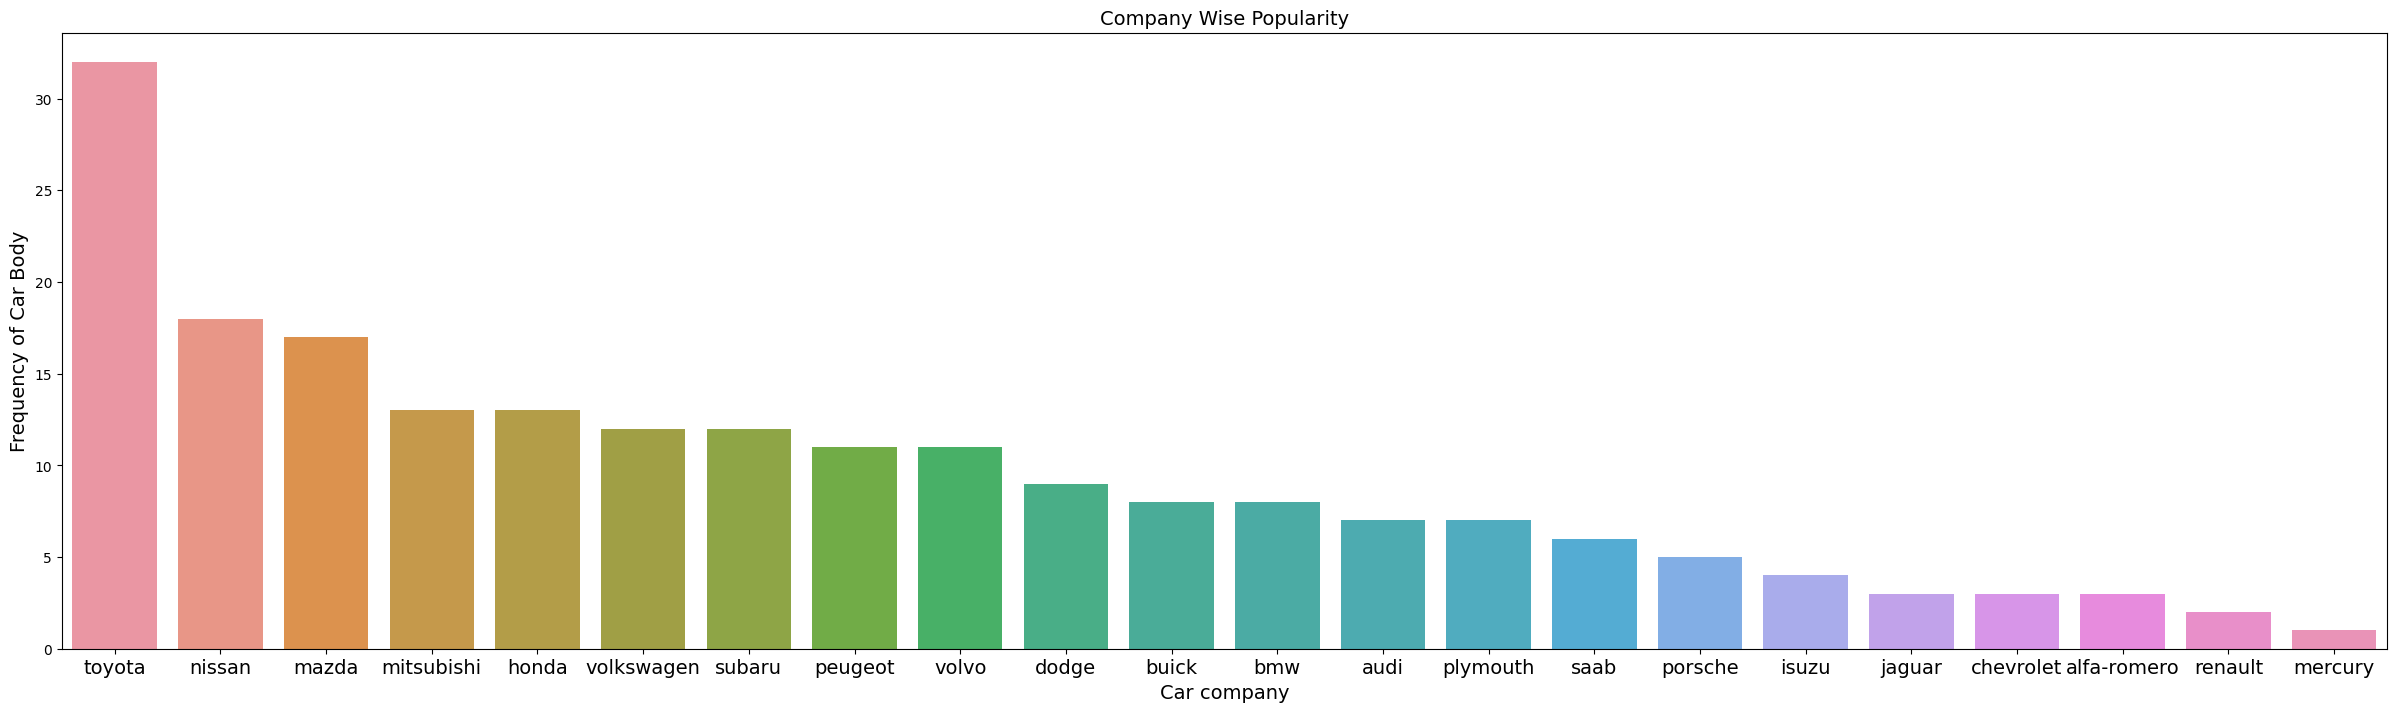

In [86]:
#plotting count of company names

plt.figure(figsize=(30, 8))
plt1=sns.countplot(x=df.companyname, data=df, order= df.companyname.value_counts().index)
plt.title('Company Wise Popularity', size=14)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Frequency of Car Body', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()

In [87]:
def replace_values(a,b):
    df.companyname.replace(a,b,inplace=True)

replace_values('chevrolet','Low_End')
replace_values('dodge','Low_End')
replace_values('plymouth','Low_End')
replace_values('honda','Low_End')
replace_values('subaru','Low_End')
replace_values('isuzu','Low_End')
replace_values('mitsubishi','Budget')
replace_values('renault','Budget')
replace_values('toyota','Budget')
replace_values('volkswagen','Budget')
replace_values('nissan','Budget')
replace_values('mazda','Budget')
replace_values('saab','Medium')
replace_values('peugeot','Medium')
replace_values('alfa-romero','Medium')
replace_values('mercury','Medium')
replace_values('audi','Medium')
replace_values('volvo','Medium')
replace_values('bmw','High_End')
replace_values('porsche','High_End')
replace_values('buick','High_End')
replace_values('jaguar','High_End')

df.rename(columns = {'companyname':'segment'}, inplace = True)
df.head()

,car_ID,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,Medium,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,Medium,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,Medium,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


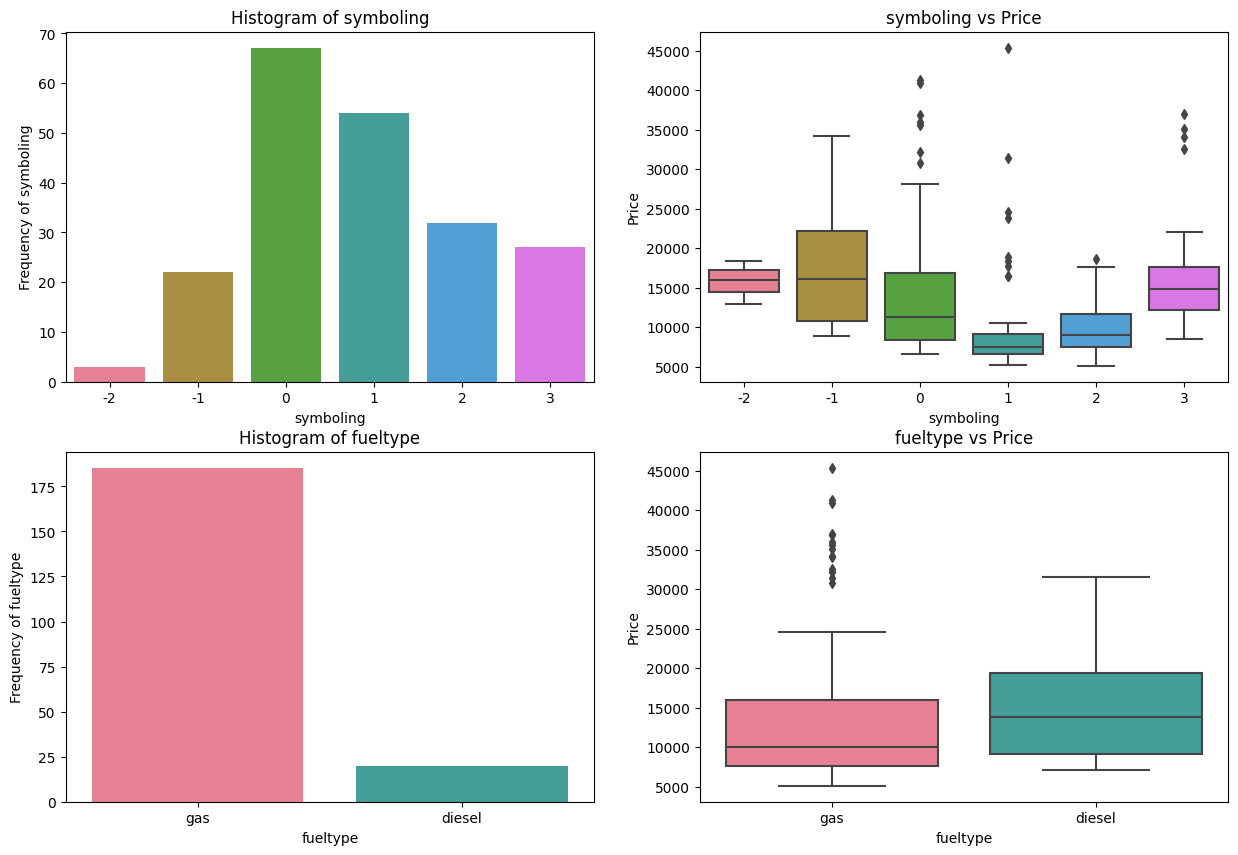

In [88]:
def plot_charts(var1, var2):
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.title('Histogram of ' + var1)
    sns.countplot(data=df, x=var1, palette="husl")
    plt.xlabel(var1)
    plt.ylabel('Frequency of {}'.format(var1))
    
    plt.subplot(2, 2, 2)
    plt.title(var1 + ' vs Price')
    sns.boxplot(data=df, x=var1, y='price', palette="husl")
    plt.xlabel(var1)
    plt.ylabel('Price')
    
    plt.subplot(2, 2, 3)
    plt.title('Histogram of ' + var2)
    sns.countplot(data=df, x=var2, palette="husl")
    plt.xlabel(var2)
    plt.ylabel('Frequency of {}'.format(var2))
    
    plt.subplot(2, 2, 4)
    plt.title(var2 + ' vs Price')
    sns.boxplot(data=df, x=var2, y='price', palette="husl")
    plt.xlabel(var2)
    plt.ylabel('Price')
    
    plt.show()


plot_charts('symboling', 'fueltype')

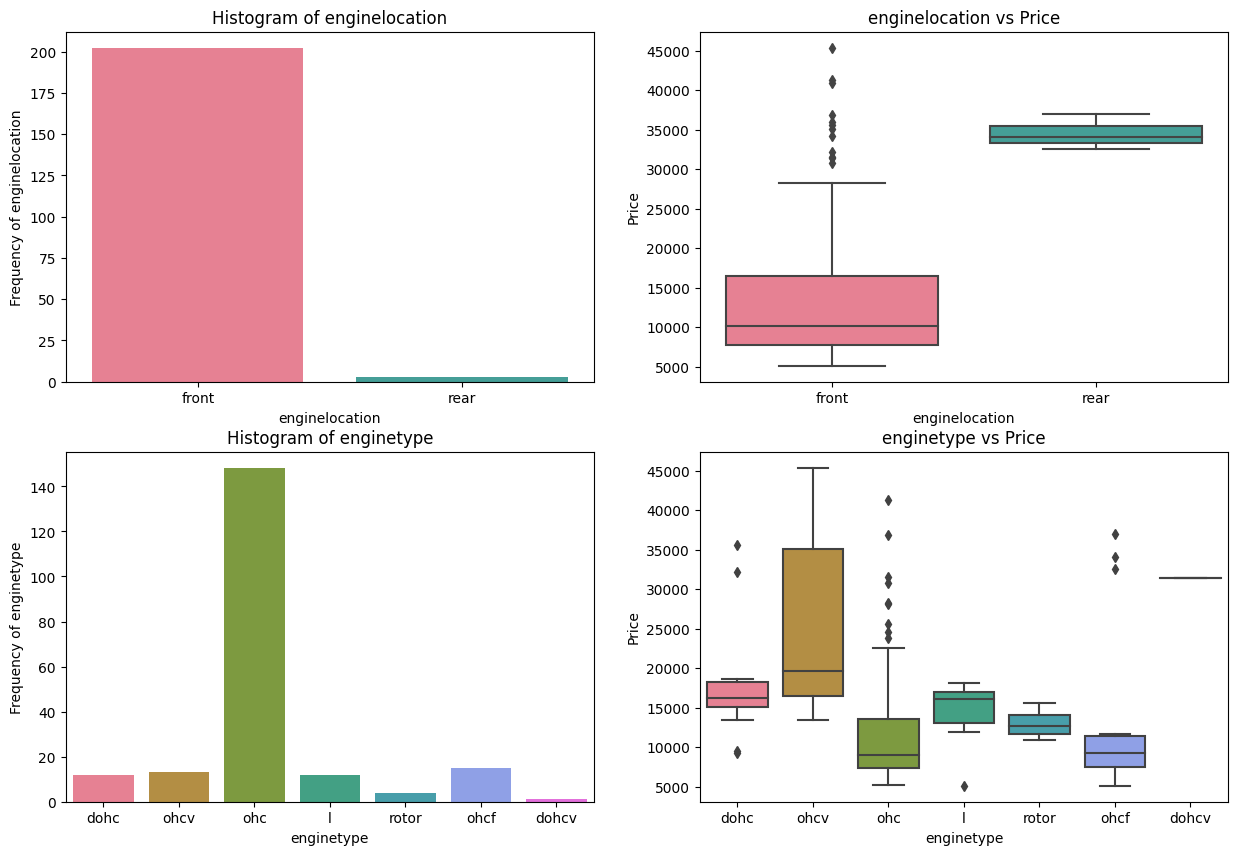

In [89]:
plot_charts('enginelocation', 'enginetype')

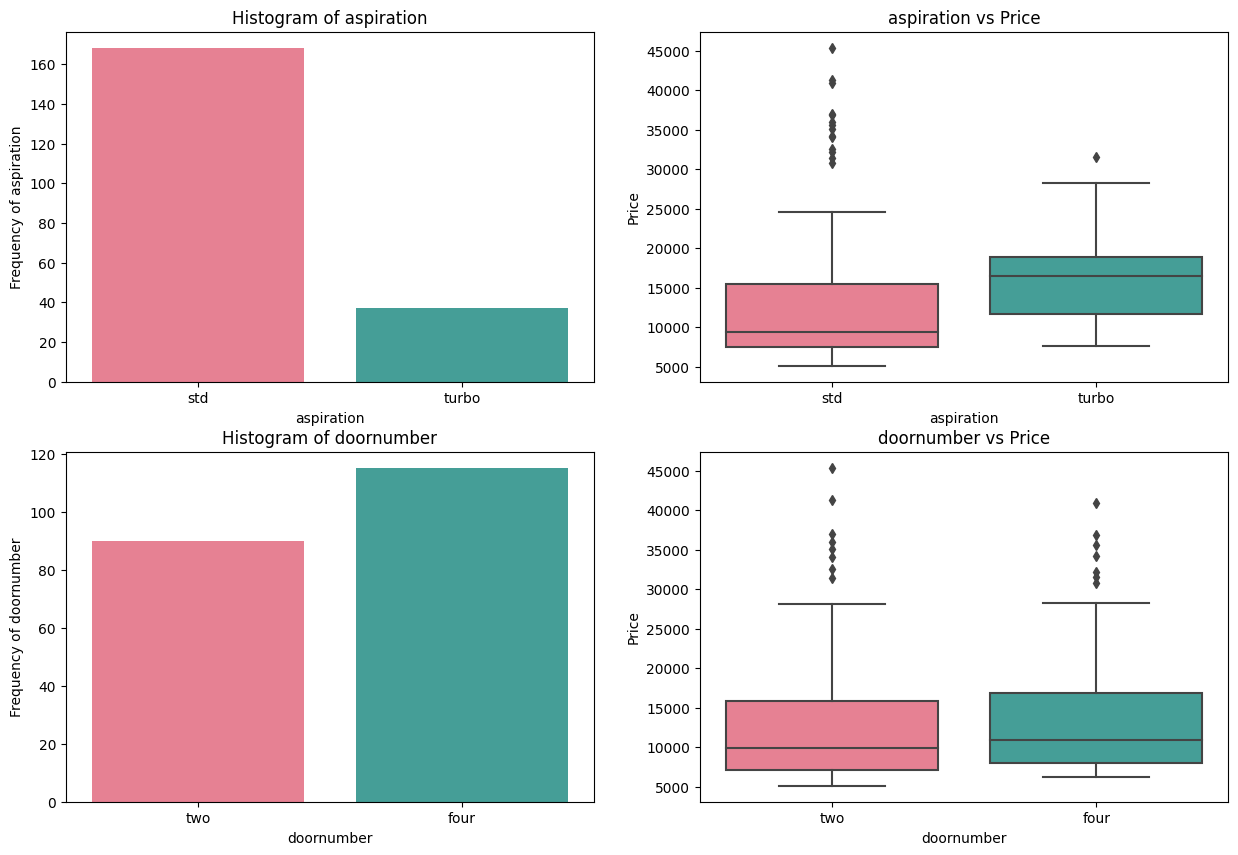

In [90]:
plot_charts('aspiration', 'doornumber')

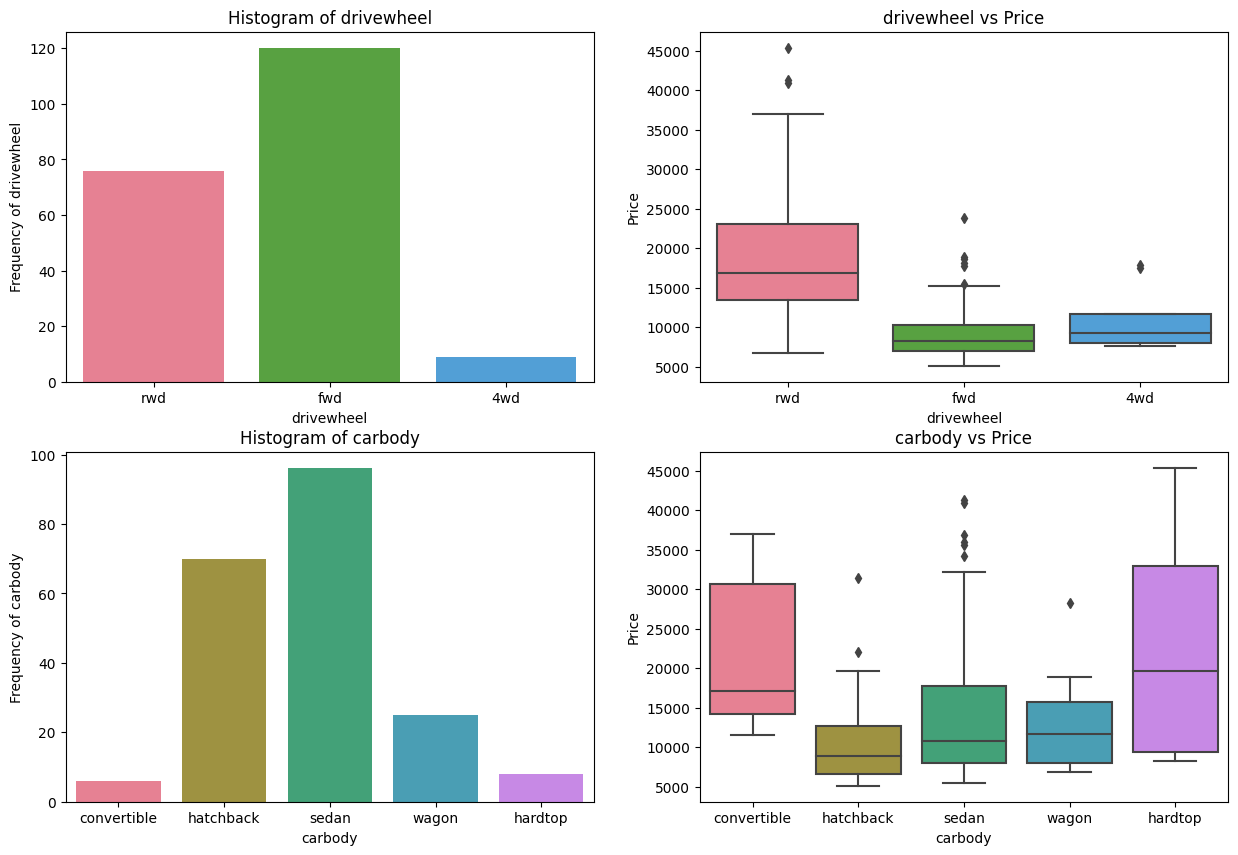

In [91]:
plot_charts('drivewheel', 'carbody')

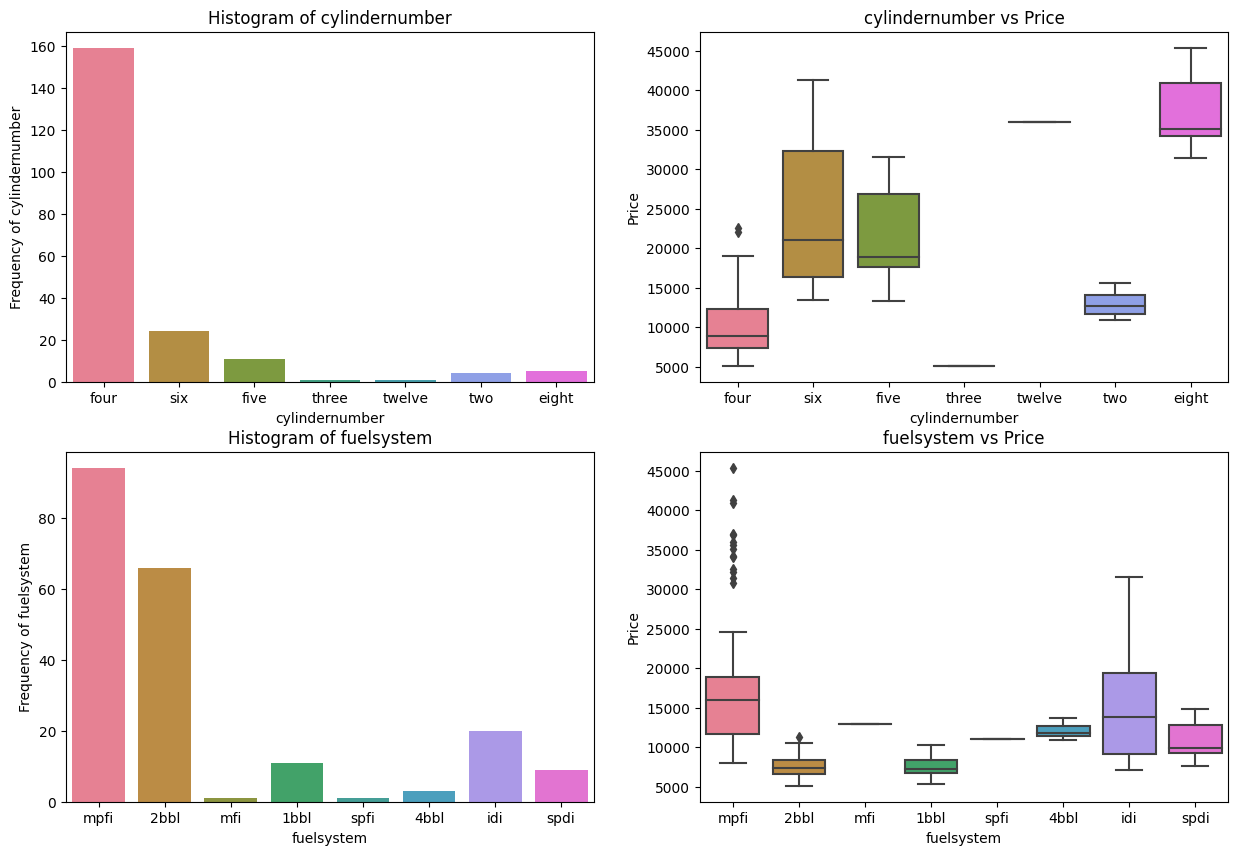

In [92]:
plot_charts('cylindernumber', 'fuelsystem')

# VISUALIZING NUMERIC VARIABLES

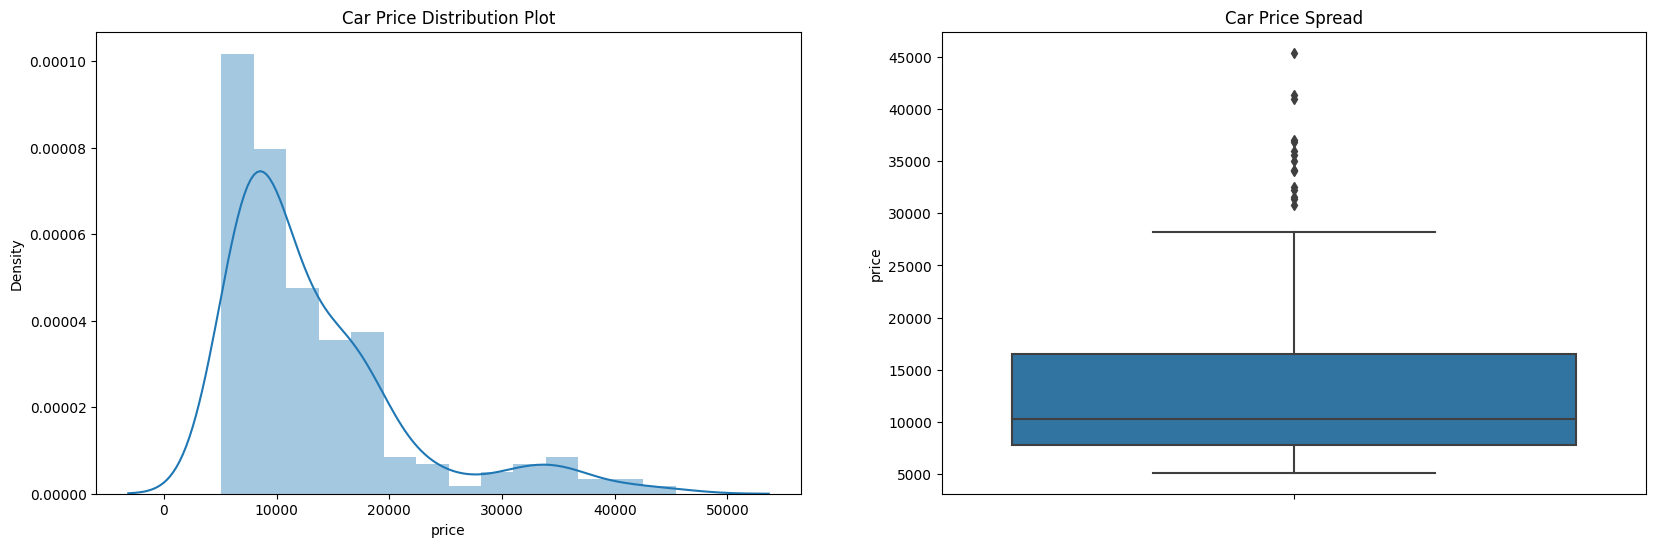

In [93]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [94]:
df.select_dtypes(include=['float64','int64']).columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

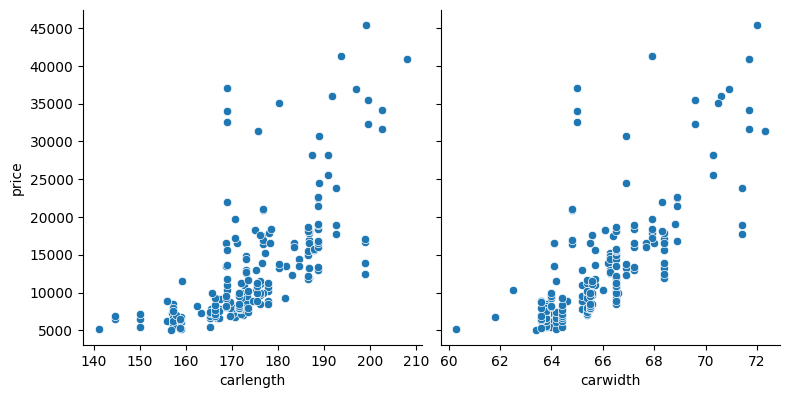

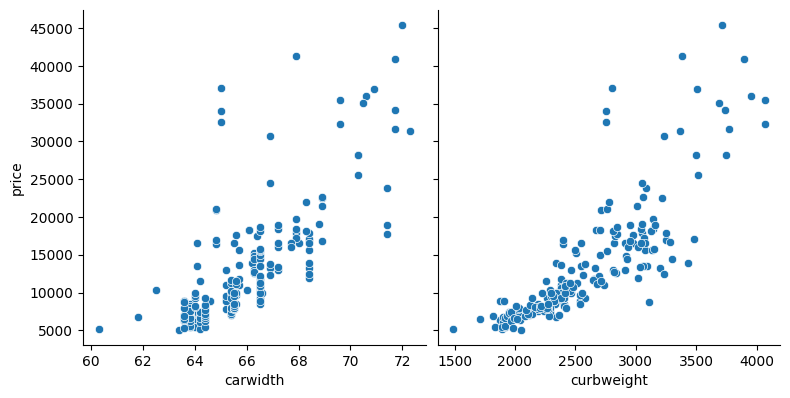

In [95]:
def pp(x,y):
    sns.pairplot(df, x_vars=[x,y], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('carlength', 'carwidth')
pp('carwidth', 'curbweight')

In [96]:
def replace_values(a,b):
   df.cylindernumber.replace(a,b,inplace=True)

replace_values('four','4')
replace_values('six','6')
replace_values('five','5')
replace_values('three','3')
replace_values('twelve','12')
replace_values('two','2')
replace_values('eight','8')

df.cylindernumber=df.cylindernumber.astype('int')

In [97]:
df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [98]:
def replace_values(a,b):
    df.symboling.replace(a,b,inplace=True)

replace_values(3,'Very_Risky')
replace_values(2,'Moderately_Risky')
replace_values(1,'Neutral')
replace_values(0,'Safe')
replace_values(-1,'Moderately_Safe')
replace_values(-2,'Very_Safe')

In [99]:
df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})
df['aspiration'] = df['aspiration'].map({'std': 1, 'turbo': 0})
df['doornumber'] = df['doornumber'].map({'two': 1, 'four': 0})
df['enginelocation'] = df['enginelocation'].map({'front': 1, 'rear': 0})

In [100]:
df.drop(['car_ID'], axis =1, inplace = True)

In [101]:
num_vars=df.select_dtypes(include=['float64','int64']).columns

<Axes: >

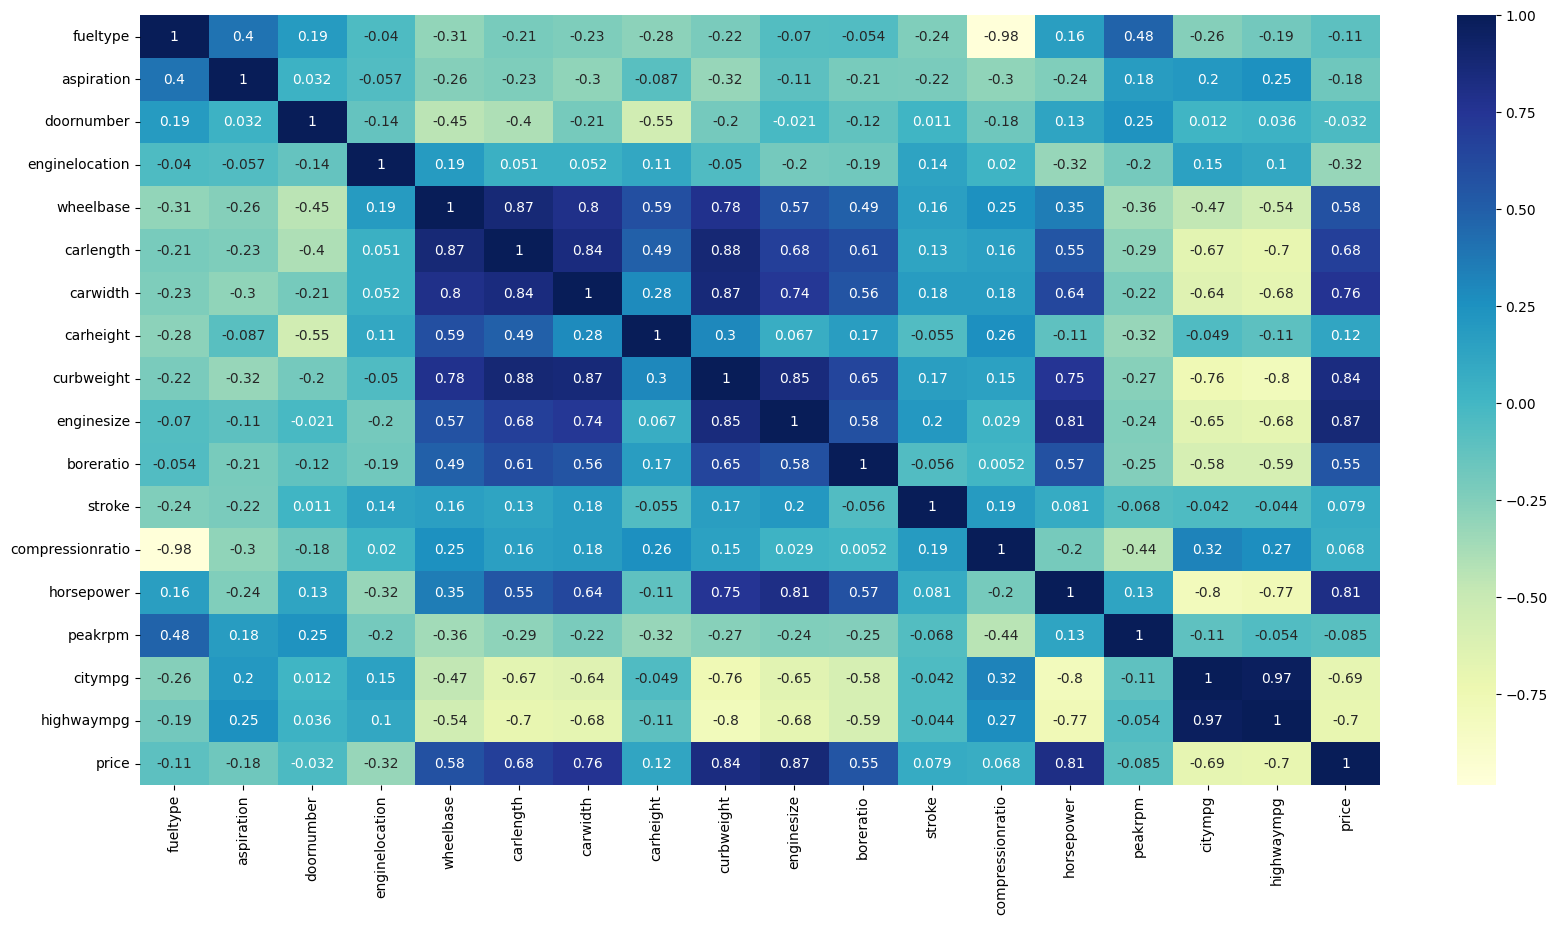

In [102]:
# plotting heatmap to check correlation amongst variables
num_vars=df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize = (20,10))  
sns.heatmap(df[num_vars].corr(),cmap="YlGnBu",annot = True)

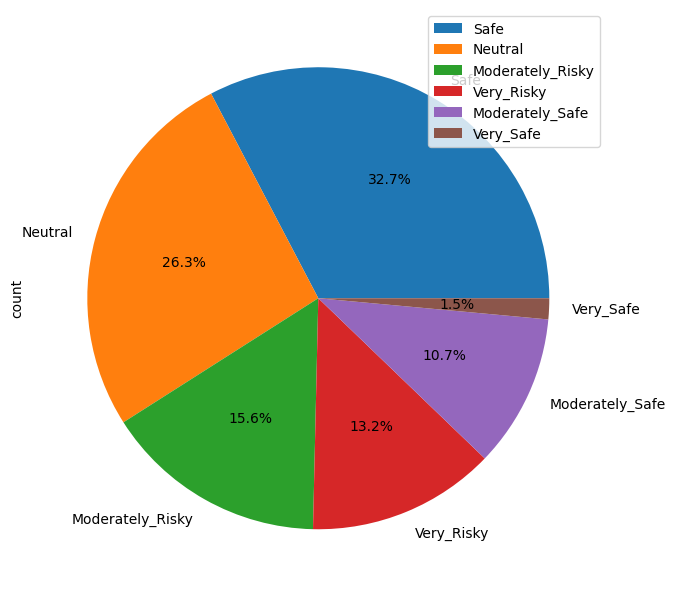

<Figure size 640x480 with 0 Axes>

In [103]:
df_sym = pd.DataFrame(df['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

In [104]:
 df.drop(['compressionratio','carwidth','curbweight','wheelbase','citympg'], axis =1, inplace = True)

In [105]:
df.head()

,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,highwaympg,price
0,Very_Risky,Medium,1,1,1,convertible,rwd,1,168.8,48.8,dohc,4,130,mpfi,3.47,2.68,111,5000,27,13495.0
1,Very_Risky,Medium,1,1,1,convertible,rwd,1,168.8,48.8,dohc,4,130,mpfi,3.47,2.68,111,5000,27,16500.0
2,Neutral,Medium,1,1,1,hatchback,rwd,1,171.2,52.4,ohcv,6,152,mpfi,2.68,3.47,154,5000,26,16500.0
3,Moderately_Risky,Medium,1,1,0,sedan,fwd,1,176.6,54.3,ohc,4,109,mpfi,3.19,3.40,102,5500,30,13950.0
4,Moderately_Risky,Medium,1,1,0,sedan,4wd,1,176.6,54.3,ohc,5,136,mpfi,3.19,3.40,115,5500,22,17450.0


In [106]:
df=pd.get_dummies(df)
df.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,1,1,1,168.8,48.8,4,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,1,1,1,1,168.8,48.8,4,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1,1,1,1,171.2,52.4,6,152,2.68,3.47,...,True,False,False,False,False,False,False,True,False,False
3,1,1,0,1,176.6,54.3,4,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,1,1,0,1,176.6,54.3,5,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


## TRAIN_TEST

In [107]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [108]:
# SCAILING NUMERIC VARIABLES
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [109]:
num_vars = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']

In [110]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,1.0,1.0,0.0,1.0,0.426016,0.265487,4,0.139623,0.230159,0.525253,...,False,False,False,True,False,False,False,False,False,False
125,1.0,1.0,1.0,1.0,0.452033,0.212389,4,0.339623,1.000000,0.464646,...,False,False,False,False,False,False,False,True,False,False
166,1.0,1.0,1.0,1.0,0.448780,0.424779,4,0.139623,0.444444,0.449495,...,False,False,False,False,False,False,False,True,False,False
1,1.0,1.0,1.0,1.0,0.450407,0.088496,4,0.260377,0.626984,0.247475,...,False,False,False,False,False,False,False,True,False,False
199,1.0,0.0,0.0,1.0,0.775610,0.858407,4,0.260377,0.746032,0.484848,...,False,False,False,False,False,False,False,True,False,False


In [111]:
y_train = df_train.pop('price')
X_train = df_train

In [116]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 16),
 ('aspiration', True, 1),
 ('doornumber', False, 9),
 ('enginelocation', True, 1),
 ('carlength', True, 1),
 ('carheight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('highwaympg', True, 1),
 ('symboling_Moderately_Risky', False, 12),
 ('symboling_Moderately_Safe', False, 3),
 ('symboling_Neutral', False, 14),
 ('symboling_Safe', False, 13),
 ('symboling_Very_Risky', False, 11),
 ('symboling_Very_Safe', True, 1),
 ('segment_Budget', True, 1),
 ('segment_High_End', True, 1),
 ('segment_Low_End', True, 1),
 ('segment_Medium', False, 20),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 6),
 ('carbody_hatchback', False, 10),
 ('carbody_sedan', False, 7),
 ('carbody_wagon', False, 4),
 ('drivewheel_4wd', False, 21),
 ('drivewheel_fwd', False, 2),
 ('drivewheel_rwd', False, 8),
 ('enginetype_dohc', True, 1),
 ('enginetype_dohcv', Tru

In [112]:
X_train.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,1.0,1.0,0.0,1.0,0.426016,0.265487,4,0.139623,0.230159,0.525253,...,False,False,False,True,False,False,False,False,False,False
125,1.0,1.0,1.0,1.0,0.452033,0.212389,4,0.339623,1.000000,0.464646,...,False,False,False,False,False,False,False,True,False,False
166,1.0,1.0,1.0,1.0,0.448780,0.424779,4,0.139623,0.444444,0.449495,...,False,False,False,False,False,False,False,True,False,False
1,1.0,1.0,1.0,1.0,0.450407,0.088496,4,0.260377,0.626984,0.247475,...,False,False,False,False,False,False,False,True,False,False
199,1.0,0.0,0.0,1.0,0.775610,0.858407,4,0.260377,0.746032,0.484848,...,False,False,False,False,False,False,False,True,False,False


In [113]:
X_train.shape,y_train.shape


((143, 46), (143,))

In [114]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

In [117]:
y_train_price=lm.predict(X_train)

In [126]:
test_data_df = x_test.copy()
test_data_df['Predicted_price'] = pred
test_data_df.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Predicted_price
160,1,1,0,1,166.3,53.0,4,98,3.19,3.03,...,False,False,True,False,False,False,False,False,False,901.689274
186,1,1,0,1,171.7,55.7,4,109,3.19,3.40,...,False,False,False,False,False,False,True,False,False,985.516016
59,1,1,1,1,177.8,53.7,4,122,3.39,3.39,...,False,False,True,False,False,False,False,False,False,935.576603
165,1,1,1,1,168.7,52.6,4,98,3.24,3.08,...,False,False,False,False,False,False,True,False,False,1177.957687
140,1,1,1,1,157.3,55.7,4,108,3.62,2.64,...,False,False,True,False,False,False,False,False,False,851.020540


In [128]:
lm.score(x_test, y_test)

-2.3204860031751946

In [129]:
mse = mean_squared_error(y_test, pred)
mse

232530634.5791311

In [130]:
lm.intercept_

0.25254897468778076